# Uvod u kompjutersku viziju
## Piksel po piksel, slika
Nadam se da volite matrice

In [2]:
import cv2
from random import randint
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
match randint(1, 6):
    case 1:
        ime_fajla = "Milutin1"
    case 2:
        ime_fajla = "Milutin2"
    case 3:
        ime_fajla = "Hram1"
    case 4:
        ime_fajla = "Hram2"
    case 5:
        ime_fajla = "Mara1"
    case 6:
        ime_fajla = "Mara2"
    case _:
        ime_fajla = "Hram1"

Učitavanje slike

In [5]:
img1 = cv2.imread(f"./InputImages/{ime_fajla}.jpg")

Prikazivanje slike

In [6]:
cv2.imshow("img1", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Čuvanje slike

In [8]:
cv2.imwrite(f"./OutputImages/{ime_fajla}_nepromenjen.jpg", img1)

True

Seckanje slike

In [11]:
print(f"Velicina slike: {img1.shape}")

Velicina slike: (470, 830, 3)


In [10]:
sec = img1[140:210, 325:395]

In [11]:
cv2.imshow("Original", img1)
cv2.imshow("Secnuto", sec)
cv2.waitKey(0)
cv2.destroyAllWindows()

Rotacija

In [13]:
rotirano = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)

In [14]:
cv2.imshow("Original", img1)
cv2.imshow("Rotirano", rotirano)
cv2.waitKey(0)
cv2.destroyAllWindows()

Promena velicine
- Da li vidite razliku razlicitim metodama?
- Zasto razlicite metode?

In [7]:
velicina_slike = (1000, 800)
scale_area = cv2.resize(img1, velicina_slike, cv2.INTER_CUBIC)  # INTER_AREA, INTER_CUBIC, INTER_LINEAR

In [8]:
cv2.imshow("Original", img1)
cv2.imshow("Skalirano", scale_area)
cv2.waitKey(0)
cv2.destroyAllWindows()

Konvolucija

In [107]:
kernel_dimenzija = 3
kernel = np.ones((kernel_dimenzija, kernel_dimenzija), dtype=np.float32)
kernel /= kernel_dimenzija**2
slika_rezultat = cv2.filter2D(img1, -1, kernel, borderType=cv2.BORDER_CONSTANT)  # cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT

In [108]:
cv2.imshow("Original", img1)
cv2.imshow("Matricno mnozenje", slika_rezultat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
slika_rezultat[:,:,0].min()

0

Blur, sharpening, filtriranje

In [ ]:
# Gausijan - Primer "Blur"
kernel_dimenzija = 3
kernel = cv2.getGaussianKernel(3, 3)

In [31]:
# Laplasijan - Primer "Shaprening"
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

In [78]:

# Nelinearno filtriranje, zasto?
kernel = np.array([[0, 0, 1/5, 0, 0],
                    [0, 0, 1/5, 0, 0],
                    [0, 0, 1/5, 0, 0],
                    [0, 0, 1/5, 0, 0],
                    [0, 0, 1/5, 0, 0]])

In [79]:
slika_rezultat = cv2.filter2D(img1, -1, kernel, borderType=cv2.BORDER_CONSTANT)  # cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT

In [ ]:
# Dodatak Laplasijanu
slika_rezultat = img1 + slika_rezultat * 0.1
slika_rezultat -= slika_rezultat.min()
slika_rezultat *= (255/slika_rezultat.max())
slika_rezultat = slika_rezultat.astype(np.uint8)

In [80]:
cv2.imshow("Original", img1)
cv2.imshow("Rezultat", slika_rezultat)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detekcija ivice

Sobbel 3x3

In [81]:

h_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

h_y = np.array([[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])

h_xd = np.array([[-2, 1, 0],
                 [-1, 0, 1],
                 [ 0, 1, 2]])

h_yd = np.array([[ 0, 1, 2],
                 [ 1, 0, -1],
                 [ 0, -1, -2]])

In [84]:

img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

In [ ]:
img1_x = cv2.filter2D(img1_gray, -1, h_x)
img1_y = cv2.filter2D(img1_gray, -1, h_y)
img1_xd = cv2.filter2D(img1_gray, -1, h_xd)
img1_yd = cv2.filter2D(img1_gray, -1, h_yd)

In [85]:
cv2.imshow("Original", img1_gray)
cv2.imshow("X", img1_x)
cv2.imshow("Y", img1_y)
cv2.imshow("XD", img1_xd)
cv2.imshow("YD", img1_yd)
cv2.waitKey(0)
cv2.destroyAllWindows()

Canny

In [88]:
img1_gray_canny = cv2.Canny(img1_gray, 100, 200)

In [89]:
cv2.imshow("Original", img1_gray)
cv2.imshow("Canny", img1_gray_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

Color sistemi

YCbCr

In [123]:
# Rucno
img1_ycbcr = np.array(np.zeros(list(img1.shape)))
for xa in range(0, img1.shape[0]):
    for ya in range(0, img1.shape[1]):
        b = img1[xa][ya][0]  # B
        g = img1[xa][ya][0]  # G
        r = img1[xa][ya][0]  # R
        y = .299*r + .587*g + .114*b
        cb = 128 -.168736*r -.331364*g + .5*b
        cr = 128 +.5*r - .418688*g - .081312*b
        img1_ycbcr[xa][ya][0] = y
        img1_ycbcr[xa][ya][1] = cb
        img1_ycbcr[xa][ya][2] = cr
img1_ycbcr = img1_ycbcr.astype(np.uint8)

In [30]:
img1_ycbcr = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb)

In [31]:
cv2.imshow("Original", img1)
cv2.imshow("Y", img1_ycbcr[:,:,0])
onlyCb = img1_ycbcr.copy()
onlyCb[0] = 128
onlyCb[2] = 128
cv2.imshow("Cb", onlyCb)
onlyCr = img1_ycbcr.copy()
onlyCr[0] = 128
onlyCr[1] = 128
cv2.imshow("Cr", onlyCr)
cv2.waitKey(0)
cv2.destroyAllWindows()

HSV

In [27]:
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

In [10]:
cv2.imshow("Original", img1)
cv2.imshow("H", img1_hsv[:,:,0])
cv2.imshow("S", img1_hsv[:,:,1])
cv2.imshow("V", img1_hsv[:,:,2])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
img1_hsv[:,:,0] = (img1_hsv[:,:,0] + 128) % 255
img2 = cv2.cvtColor(img1_hsv, cv2.COLOR_HSV2BGR)

In [29]:
cv2.imshow("Original", img1)
cv2.imshow("Promenjeno", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Histogrami, binarizacija i segmentacija

Histogram

In [71]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
hist_f, bin_edges = np.histogram(img1_gray.flatten(), bins=256, range=[0,255])

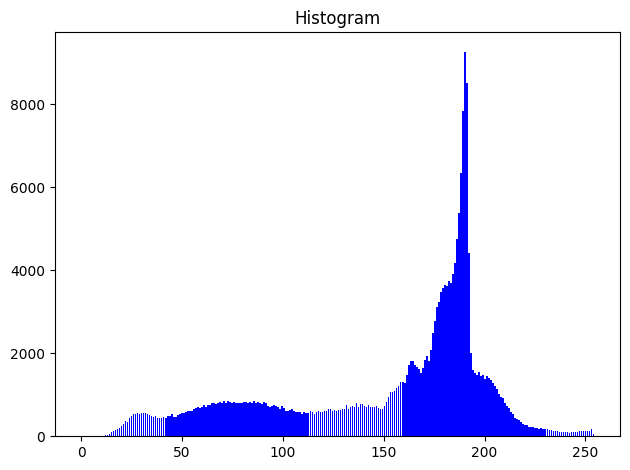

In [72]:
plt.bar(bin_edges[0:-1], hist_f, color='b')

plt.title('Histogram')
plt.tight_layout()
plt.show()

Razvlacenje

In [79]:
img1_out = skimage.exposure.rescale_intensity(image=img1_gray, in_range=(50, 150), out_range=(0, 255)).astype(np.uint8)

In [80]:
cv2.imshow("Original", img1_gray)
cv2.imshow("Promenjeno", img1_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


Izdvajanje regiona odredjene sjajnosti

In [87]:

img1_out = np.copy(img1_gray)
img1_out[(img1_out>30) & (img1_out<70)] = 255

In [88]:
cv2.imshow("Original", img1_gray)
cv2.imshow("Promenjeno", img1_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


Ekvivalizacija histograma

In [ ]:
img1_out = np.copy(img1_gray)
img1_out[(img1_out>30) & (img1_out<70)] = 255

Oponasanje histograma

In [100]:
img2 = cv2.imread(f"./InputImages/Hram1.jpg")
img1_out = skimage.exposure.match_histograms(img1, img2).astype(np.uint8)

In [99]:
cv2.imshow("Original", img1)
cv2.imshow("Ubacena", img2)
cv2.imshow("Promenjeno", img1_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Binarizacija

In [105]:
img1_out = np.where(img1_gray>130, 255, 0).astype(np.uint8)

In [107]:
cv2.imshow("Original", img1_gray)
cv2.imshow("Promenjeno", img1_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Segmentacija

In [7]:
coins = cv2.imread(f"./InputImages/coins.JPG")
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

thresh_mean = skimage.filters.threshold_mean(coins_gray.flatten())
coins_bin = np.where(coins_gray>thresh_mean, 255, 0).astype(np.uint8)

Zasto?

In [5]:
cv2.imshow("Original", coins_gray)
cv2.imshow("binarizovano", coins_bin)
cv2.waitKey(0)
cv2.destroyAllWindows()

Ispravka

In [8]:
coins_gray2 = cv2.medianBlur(coins_gray, 13)

thresh_mean = skimage.filters.threshold_mean(coins_gray2.flatten())
coins_bin = np.where(coins_gray2>thresh_mean, 255, 0).astype(np.uint8)

In [16]:
cv2.imshow("Original", coins_gray)
cv2.imshow("Filtrirano", coins_gray2)
cv2.imshow("Binarizovano", coins_bin)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
circles = cv2.HoughCircles(coins_gray2, cv2.HOUGH_GRADIENT, 1, coins_bin.shape[0] / 8, param1=100, param2=30, minRadius=1, maxRadius=100)

In [39]:
coins_gray_out = coins_gray.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    center = (i[0], i[1])
    # circle center
    cv2.circle(coins_gray_out, center, 1, (0, 100, 100), 3)
    # circle outline
    radius = i[2]
    cv2.circle(coins_gray_out, center, radius, (255, 0, 255), 3)


cv2.imshow("detected circles", coins_gray_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Zadatak. 
1. Detekcija karte na slici
2. Ispis znaka i broja na karti

TODO: Napraviti "dataset"